In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 0.2 + 25*x -200*x**2 + 675 * x**3 - 900*x**4+400*x**5

In [3]:
p = np.polynomial.Polynomial([0.2,25,-200,675,-900,400])
print(p)

0.2 + 25.0·x¹ - 200.0·x² + 675.0·x³ - 900.0·x⁴ + 400.0·x⁵


In [4]:
p(2)

3050.2

In [18]:
x=np.linspace(0,0.8,6)
y = p(x)

xx=np.linspace(0,0.8,300)
yy = p(xx)


In [16]:
y

array([0.2       , 1.29691904, 1.74339328, 3.18601472, 3.18192896,
       0.232     ])

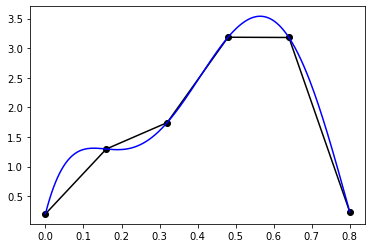

In [19]:
plt.plot(x,y,"ko-")
plt.plot(xx,yy,"b-")
plt.show()

In [19]:
import scipy.integrate as integrate

In [20]:
I = integrate.quad(f,0,0.8)

In [22]:
# Analytical solution
print(I[0])
I_t = I[0]

1.6405333333333307


In [35]:
def err_I(I):
    I_t = 1.6405333333333307
    return np.abs(I_t - I)/I_t*100

## Numerical Integration
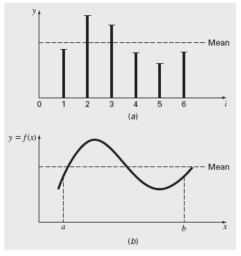  
(Figure: Chapra)

$$\text{Mean} = \frac{\sum_i{y_i}}{n}$$
$$\text{Mean} = \frac{\int_a^b{f(x)dx}}{b-a}$$

In [41]:
randos = np.random.rand(10)*(b-a)+a
randos.sort()
print(randos)

[0.11604262 0.12231294 0.17098086 0.26648012 0.49618914 0.5973263
 0.63241841 0.65572686 0.68102525 0.78282076]


In [43]:
a = 0
b = 0.8
N = 10
for n in range(2,N):
    print("n: ",n)
    
    # equal spaced intervals
    x = np.linspace(a,b,n)
    
    # random spaced intervals
    #x = np.random.rand(10)*(b-a)+a
    #x.sort()

    # Addition of composite integrals
    # I = I1 + I2 + ...
    I = 0
    for i in range(1,n):
        #print(x[i-1],x[i])
        delta_x = x[i]-x[i-1]
        I += (p(x[i-1]) + p(x[i]))/2 * delta_x
    print("Addition of composite integrals: {:.6f} (Err:{:.1f}%)".format(I,err_I(I)))

    # Via calculating means of the means

    m = []
    for i in range(1,n):
        m.append((p(x[i-1]) + p(x[i]))/2)
    mm = np.array(m)
    #print(mm.mean())
    I_mm = mm.mean() * (b-a)
    print("Via means of the means: {:.6f}(Err:{:.1f}%)".format(I_mm,err_I(I_mm)))
    print("-"*40)

n:  2
Addition of composite integrals: 0.172800 (Err:89.5%)
Via means of the means: 0.172800(Err:89.5%)
----------------------------------------
n:  3
Addition of composite integrals: 1.068800 (Err:34.9%)
Via means of the means: 1.068800(Err:34.9%)
----------------------------------------
n:  4
Addition of composite integrals: 1.369574 (Err:16.5%)
Via means of the means: 1.369574(Err:16.5%)
----------------------------------------
n:  5
Addition of composite integrals: 1.484800 (Err:9.5%)
Via means of the means: 1.484800(Err:9.5%)
----------------------------------------
n:  6
Addition of composite integrals: 1.539881 (Err:6.1%)
Via means of the means: 1.539881(Err:6.1%)
----------------------------------------
n:  7
Addition of composite integrals: 1.570265 (Err:4.3%)
Via means of the means: 1.570265(Err:4.3%)
----------------------------------------
n:  8
Addition of composite integrals: 1.588743 (Err:3.2%)
Via means of the means: 1.588743(Err:3.2%)
----------------------------------

## Newton - Cotes Method
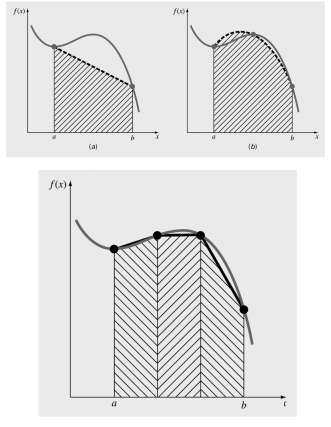

Approximating using polynomials.

### The Trapezoidal Rule
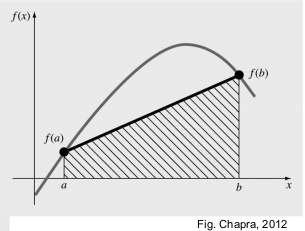

$$ \begin{align*}I &= \int_a^b{f_n(x)dx}\\
&\approx \int_a^b{\left[f(a)+\frac{f(b)-f(a)}{b-a}(x-a)\right]dx}\\
&=(b-a)\frac{f(a)+f(b)}{2}\end{align*}$$

**Composite Trapezoidal Rule**
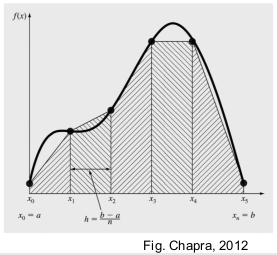

* Assuming n+1 data points are evenly spaced, there will be n intervals over which to integrate.
* The total integral can be calculated by integrating each subinterval and then adding them together:
$$\begin{align*}I&=\int_{x_0}^{x_n}{f(x)dx} =\int_{x_0}^{x_1}{f(x)dx}+ \int_{x_1}^{x_2}{f(x)dx}+\dots+\int_{x_n-1}^{x_n}{f(x)dx}\\
&=(x_1-x_0)\frac{f(x_0)+f(x_1)}{2}+(x_2-x_1)\frac{f(x_1)+f(x_2)}{2}+\dots+(x_n-x_{n-1})\frac{f(x_n)+f(x_{n-1})}{2}\\
&=\frac{h}{2}\left[f(x_0)+2\sum_{i=1}^{n-1}{f(x_i)}+f(x_n)\right]\end{align*}$$

## Simpson's Rule
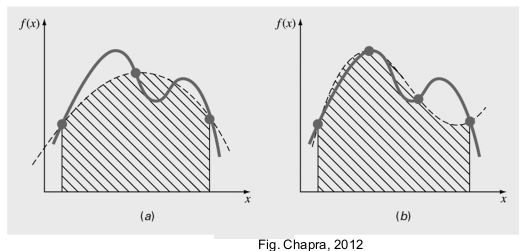

### Simpson's 1/3 Rule
2nd order polynomials. From quadratic fit of three points:
$$f_n(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0)+
\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1)+
\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)$$

$$\begin{align*}I &= \int_{x_0}^{x_2}{f_n(x)dx}\\
I&=\frac{h}{3}\left[f(x_0)+4f(x_1)+f(x_2)\right]\end{align*}$$

In [45]:
a = 0
b = 0.8
N = 3

x = np.linspace(a,b,N)
h = x[1] - x[0]
I = h/3 * (p(x[0])+4*p(x[1])+p(x[2]))
print("Integral via Simpson's 1/3: {:.6f}  Error: {:1f}%".format(I,err_I(I)))

Integral via Simpson's 1/3: 1.367467  Error: 16.644993%


**Composite Simpson's 1/3 Rule**
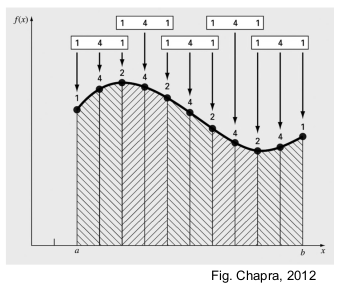

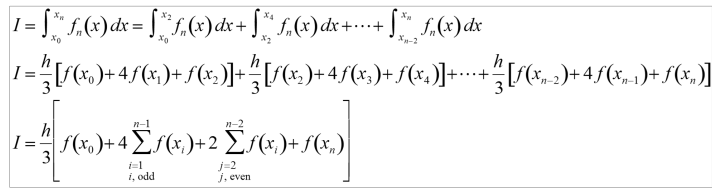

In [53]:
a = 0
b = 0.8
N = 11

x = np.linspace(a,b,N)
h = x[1] - x[0]
I_0 = p(x[0])
I_odd = np.sum(p(x[1:N:2]))
I_even = np.sum(p(x[2:N-1:2]))
I_n = p(x[N-1])

I = (h/3)*(I_0 + 4*I_odd + 2*I_even + I_n)
print("Integral via Simpson's 1/3: {:.6f}  Error: {:1f}%".format(I,err_I(I)))

l = np.arange(11)
print(l)

Integral via Simpson's 1/3: 1.640096  Error: 0.026632%
[ 0  1  2  3  4  5  6  7  8  9 10]


In [50]:
l[2:N-1:2]

array([2, 4, 6, 8])

### Simpson's 3/8 Rule

3rd order polynomials.

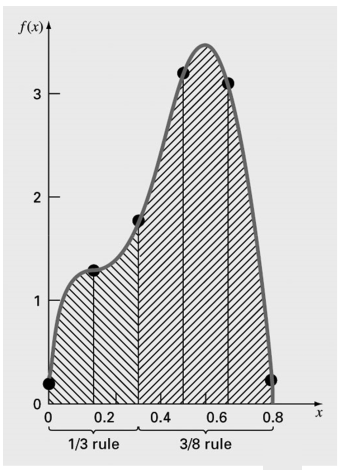

$$\begin{align*}I &= \int_{x_0}^{x_3}{f_n(x)dx}\\
I&=\frac{3h}{8}\left[f(x_0)+3f(x_1)+3f(x_2)+f(x_3)\right]\end{align*}$$

## Higher Orders
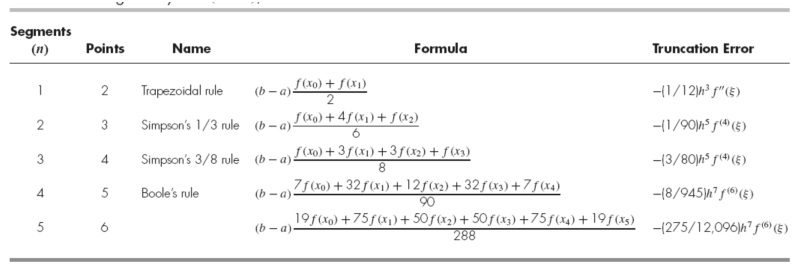

# References
* Chapra
* Eda Çelik Akdur, KMU231 Lecture Notes